<a href="https://colab.research.google.com/github/Chinmay-47/NLP_Udemy/blob/master/SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
#Data
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [154]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [156]:
df = df.drop(["Unnamed: 2",'Unnamed: 3',"Unnamed: 4"], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [157]:
df['binary_labels'] = df['v1'].map({'ham': 0 , 'spam': 1})
df

,v1,v2,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [158]:
Y = df['binary_labels'].values

In [159]:
df_Train,df_Test,Y_Train,Y_Test = train_test_split(df['v2'],Y,test_size=0.2,shuffle = True, random_state = 42)

In [160]:
tfidf = TfidfVectorizer(decode_error='ignore')
X_Train = tfidf.fit_transform(df_Train)
X_Test = tfidf.transform(df_Test)

In [161]:
# count_vectorizer = CountVectorizer(decode_error='ignore')
# X_Train = count_vectorizer.fit_transform(df_Train)
# X_Test = count_vectorizer.transform(df_Test)

In [162]:
model = AdaBoostClassifier()

In [163]:
model.fit(X_Train,Y_Train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [164]:
print("The train score is : ", model.score(X_Train,Y_Train))

The train score is :  0.9842943684092439


In [165]:
print("The test score is : ", model.score(X_Test,Y_Test))

The test score is :  0.9695067264573991


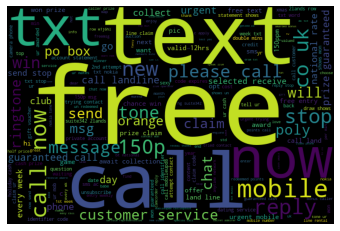

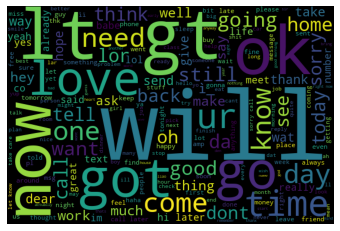

In [166]:
def visualize(label):
  words = ''
  for msg in df[df['v1'] == label]['v2']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')

In [167]:
# see what we're getting wrong
X = tfidf.transform(df['v2'])
df['predictions'] = model.predict(X)

In [169]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['binary_labels'] == 1)]['v2']
for msg in sneaky_spam:
  print("Actually spam : ", msg)

# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['binary_labels'] == 0)]['v2']
for msg in not_actually_spam:
  print("Not actually spam : ", msg)

Actually spam :  FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Actually spam :  England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/Ì¼1.20 POBOXox36504W45WQ 16+
Actually spam :  Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Actually spam :  Hey I am really horny want to chat or see me naked text hot to 69698 text charged at 150pm to unsubscribe text stop 69698
Actually spam :  100 dating service cal;l 09064012103 box334sk38ch
Actually spam :  You will recieve your tone within the next 24hrs. For Terms and conditions please see Channel U Teletext Pg 750
Actually spam :  XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
Actually spam :  88800 and 89034 are premium phone services call 087187111